<a href="https://colab.research.google.com/github/chiyeon01/Hands_On_Machine_Learning/blob/main/6%EC%9E%A5.%20%EA%B2%B0%EC%A0%95%20%ED%8A%B8%EB%A6%AC/1-10.%20%EA%B2%B0%EC%A0%95%20%ED%8A%B8%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 결정 트리
결정 트리(decision tree)는 분류와 회귀 작업 그리고 다중 출력 작업까지 가능한 다목적 머신러닝 알고리즘.<br/>
+매우 복잡한 데이터셋도 학습할 수 있는 강력한 알고리즘이다.

### 학습과 시각화

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [ ]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

In [ ]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
X = iris_df.iloc[:, 2:4]
y = iris_df.iloc[:, -1]

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file='iris_tree.dot',
    feature_names=['petal length', 'petal width'],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

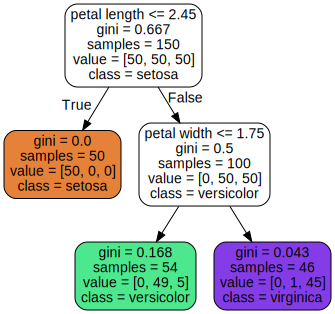

In [ ]:
from graphviz import Source

Source.from_file('iris_tree.dot')

In [ ]:
'''
위에서 Decision Tree를 시각화 한 것처럼 Decision Tree는 사람이 이해하기 쉬운 방식으로 작동된다는 점에서 화이트박스(white box) 모델이다.
랜덤 포레스트나 신경망은 반대로 블랙박스(black box) 모델이다.
그 과정을 이해하기 힘들기 때문.

max_depth=2로 설정했기 때문에 깊이가 2까지만 내려감.
이는 과적합을 방지할 수 있음.
'''

### 클래스 확률 추정

Decision Tree에서 클래스의 확률을 추정할 때는 해당 노드의 value값을 기반으로 한다.<br/>
예를들어, 아래의 예시에서 선택되는 리프노드의 value에 의해 확률은 [0(0/54), 0.90740741(49/54), 0.09259259(5/54)]가 된다.<br/>
이때 모델은 확률이 가장 높은 versicolor를 예측 값으로 내놓게 된다.

In [ ]:
tree_clf.predict_proba([[5, 1.5]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[0.        , 0.90740741, 0.09259259]])

In [ ]:
tree_clf.predict([[5, 1.5]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
'''
결정 트리는 탐욕 알고리즘이다.
이는 훌륭한 솔루션을 내세울 수도 있지만, 최적의 솔루션이라고 보장할 수는 없다.
최적의 트리를 찾는 문제는 NP-완전 문제로 알려져 있다고 한다.
NP-완전 문제는 O(exp(m))의 시간 복잡도를 가진다.
따라서 결정 트리는 '납득할 만한 좋은 솔루션'에 만족해야 한다.
'''

### 규제 매개변수
* max_depth: 트리의 최대 깊이
* max_features : 각 노드에서 분할에 사용할 특성의 최대 수
* max_leaf_nodes: 리프 노드의 최대 수
* min_samples_split: 분할되기 위해 노드가 가져야 하는 최소 샘플 수
* min_samples_leaf: 리프 노드가 생성되기 위해 가져야 하는 최소 샘플 수

In [2]:
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=150, noise=0.2, random_state=42)

tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
tree_clf1.fit(X_moons, y_moons)
tree_clf2.fit(X_moons, y_moons)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

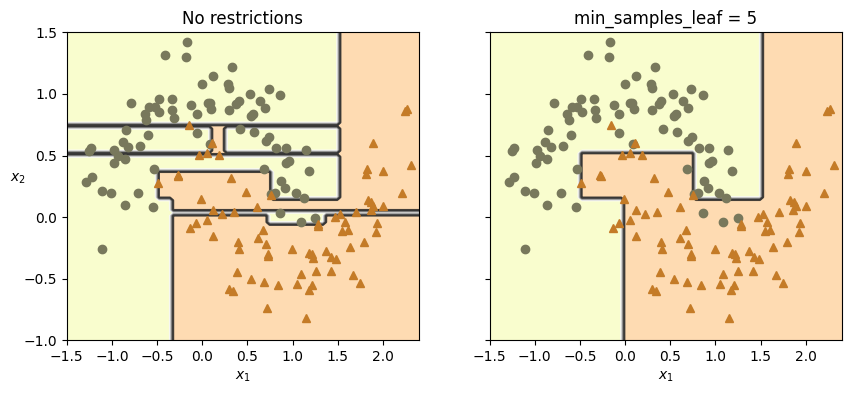

In [9]:
# 시각화에 대해서는 깊이 알지 못하기 때문에 가져왔다.
# 시각화에 대해서도 좀 더 공부해보려고 한다.

def plot_decision_boundary(clf, X, y, axes, cmap):
    x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                         np.linspace(axes[2], axes[3], 100))
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)

    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=cmap)
    plt.contour(x1, x2, y_pred, cmap="Greys", alpha=0.8)
    colors = {"Wistia": ["#78785c", "#c47b27"], "Pastel1": ["red", "blue"]}
    markers = ("o", "^")
    for idx in (0, 1):
        plt.plot(X[:, 0][y == idx], X[:, 1][y == idx],
                 color=colors[cmap][idx], marker=markers[idx], linestyle="none")
    plt.axis(axes)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$", rotation=0)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf1, X_moons, y_moons,
                       axes=[-1.5, 2.4, -1, 1.5], cmap="Wistia")
plt.title("No restrictions")
plt.sca(axes[1])
plot_decision_boundary(tree_clf2, X_moons, y_moons,
                       axes=[-1.5, 2.4, -1, 1.5], cmap="Wistia")
plt.title(f"min_samples_leaf = {tree_clf2.min_samples_leaf}")
plt.ylabel("")
# save_fig("min_samples_leaf_plot")
plt.show()

In [4]:
X_moons_test, y_moons_test = make_moons(n_samples=1000, noise=0.2, random_state=42)

In [5]:
tree_clf1.score(X_moons_test, y_moons_test)

0.901

In [6]:
tree_clf2.score(X_moons_test, y_moons_test)

0.918

### 회귀

In [10]:
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5
y_quad = X_quad ** 2 + 0.025 + np.random.randn(200, 1)

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=2, random_state=42)

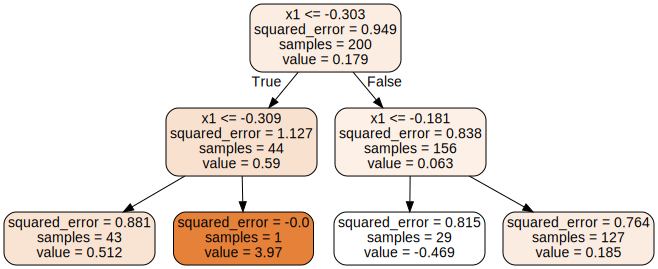

In [16]:
from sklearn.tree import export_graphviz
from graphviz import Source

export_graphviz(
    tree_reg,
    out_file='tree_reg.dot',
    feature_names=['x1'],
    rounded=True,
    filled=True
)

Source.from_file('tree_reg.dot')

In [ ]:
'''
결정 트리는 축 방향에 민감하다. (분류 시 축에 수직이 되기 때문)
이를 해결하기 위해 PCA변환을 이용하기도 함.
'''

In [ ]:
'''
결정 트리의 주요 문제는 분산이 상당히 크다는 점.
이를 해결하기 위해 RandomForest가 나옴.
(다수의 DecisionTree 모델의 평균을 내는 알고리즘)
'''